<a href="https://colab.research.google.com/github/praveenravi01/data-science-assignment/blob/main/Untitled16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

<ipython-input-4-078cdaeb8a79>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


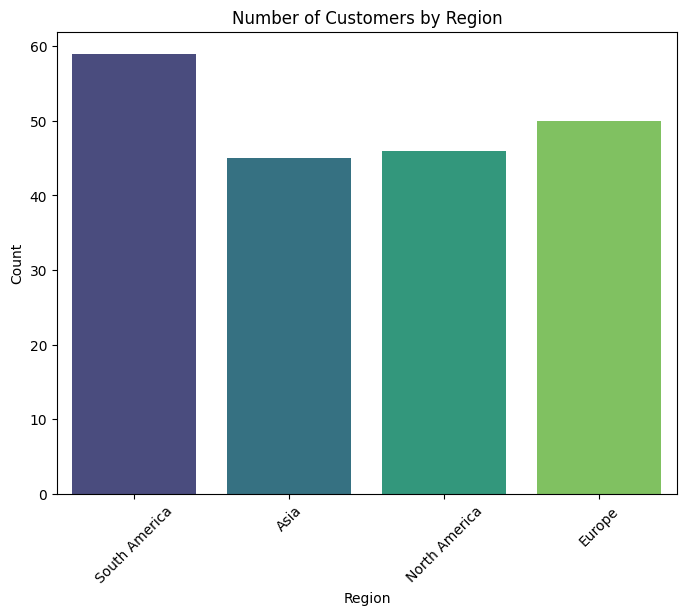


Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Product Categories:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-4-078cdaeb8a79>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='cool')


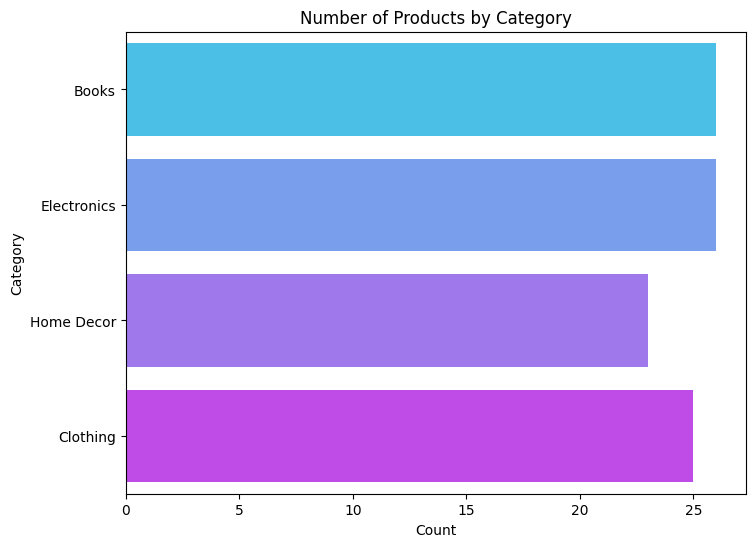


Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

Top 5 Products by Total Sales Value:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


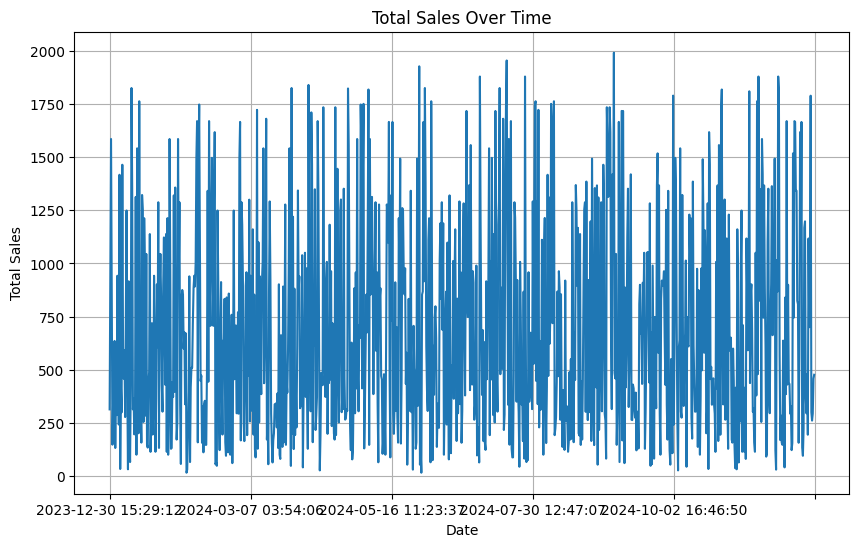


Merged Data Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLi

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/Customers.csv' )
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Preview the datasets
print("Customers dataset:")
print(customers.head())
print("\nProducts dataset:")
print(products.head())
print("\nTransactions dataset:")
print(transactions.head())

# EDA on Customers dataset
print("\nCustomers Dataset Info:")
print(customers.info())

print("\nUnique Regions:")
print(customers['Region'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# EDA on Products dataset
print("\nProducts Dataset Info:")
print(products.info())

print("\nProduct Categories:")
print(products['Category'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=products, y='Category', palette='cool')
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# EDA on Transactions dataset
print("\nTransactions Dataset Info:")
print(transactions.info())

print("\nTop 5 Products by Total Sales Value:")
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
print(product_sales.head())

plt.figure(figsize=(10, 6))
transactions.groupby('TransactionDate').sum()['TotalValue'].plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Merging datasets for combined analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print("\nMerged Data Preview:")
print(merged_data.head())

# Insights
# 1. Analyze customer distribution by region.
# 2. Identify top-selling products and categories.
# 3. Observe sales trends over time.
# 4. Analyze customer purchasing patterns.
# 5. Examine relationships between customer regions and purchasing behaviors.


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Ensure consistent column names
customers.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
transactions.rename(columns={'Product ID': 'ProductID'}, inplace=True)

# Merge datasets for analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Debug: Check merged data columns
print("Merged Data Columns:", merged_data.columns)

# Aggregating data to create customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price_y': 'mean',  # Using Price from the Products.csv
    'Category': lambda x: x.mode()[0]  # Most frequent category
}).reset_index()

# Rename 'Price_y' to 'Price' for clarity
customer_profiles.rename(columns={'Price_y': 'Price'}, inplace=True)

# Debug: Check aggregated customer_profiles
print("Customer Profiles Columns:", customer_profiles.columns)
print(customer_profiles.head())

# One-hot encode the categorical 'Category' column
customer_profiles = pd.get_dummies(customer_profiles, columns=['Category'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profiles.drop(['CustomerID'], axis=1))

# Calculate similarity using cosine similarity
similarity_matrix = cosine_similarity(scaled_features)

# Creating the lookalike recommendations
lookalike_results = {}
customer_ids = customer_profiles['CustomerID'].values

for idx, customer_id in enumerate(customer_ids[:20]):  # For the first 20 customers
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similar_customers = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]  # Top 3 excluding itself
    lookalike_results[customer_id] = [
        (customer_ids[sim_idx], round(score, 4)) for sim_idx, score in similar_customers
    ]

# Convert to DataFrame for output
lookalike_df = pd.DataFrame({
    'CustomerID': lookalike_results.keys(),
    'Lookalikes': [str(val) for val in lookalike_results.values()]
})

# Save the results to a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)

print("Lookalike recommendations for first 20 customers saved to 'Lookalike.csv'")


Merged Data Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Customer Profiles Columns: Index(['CustomerID', 'Quantity', 'TotalValue', 'Price', 'Category'], dtype='object')
  CustomerID  Quantity  TotalValue       Price     Category
0      C0001        12     3354.52  278.334000  Electronics
1      C0002        10     1862.74  208.920000     Clothing
2      C0003        14     2725.38  195.707500   Home Decor
3      C0004        23     5354.88  240.636250        Books
4      C0005         7     2034.24  291.603333  Electronics
Lookalike recommendations for first 20 customers saved to 'Lookalike.csv'


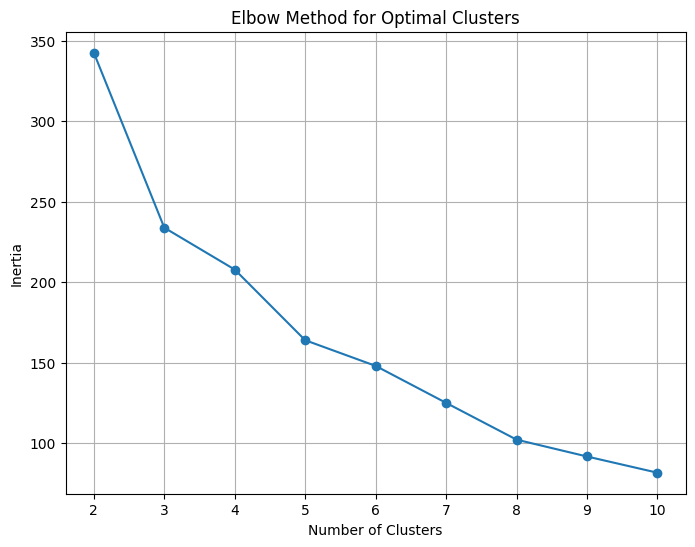

Davies-Bouldin Index: 1.12180191226693


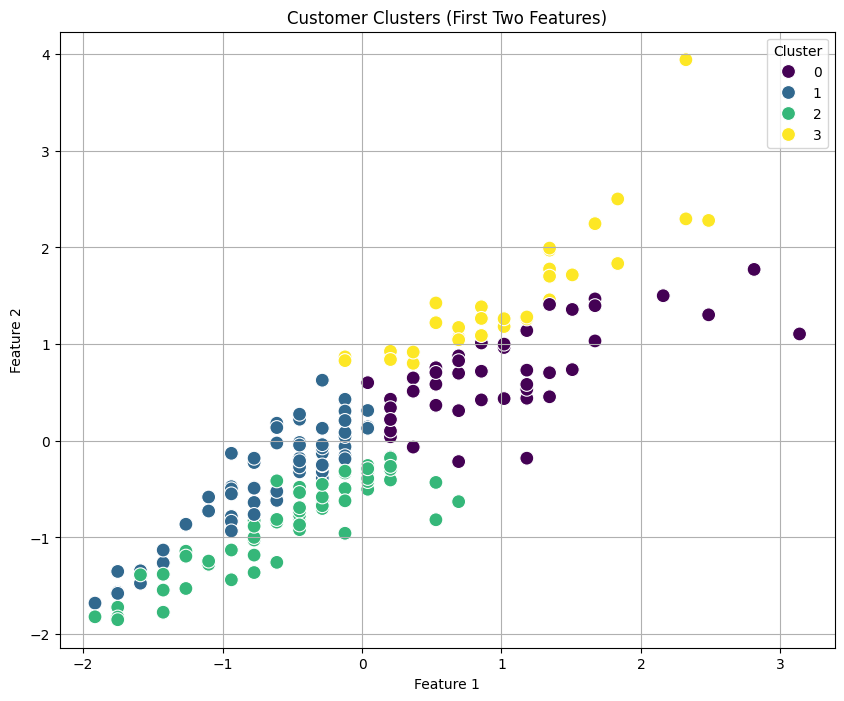

Clustering results saved to 'Customer_Clusters.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Ensure consistent column names
customers.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
transactions.rename(columns={'Product ID': 'ProductID'}, inplace=True)

# Merge datasets for analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Aggregating data for clustering
customer_profiles = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price_y': 'mean',
}).reset_index()

# Rename 'Price_y' to 'Price' for clarity
customer_profiles.rename(columns={'Price_y': 'Price'}, inplace=True)

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profiles.drop(['CustomerID'], axis=1))

# Finding the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(2, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Perform KMeans Clustering with optimal clusters (choose based on the Elbow Method)
optimal_clusters = 4  # Replace with the number identified from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the customer profiles
grouped_customer_profiles = customer_profiles.copy()
grouped_customer_profiles['Cluster'] = kmeans.labels_

# Evaluate clustering performance
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters (using the first two principal components for simplicity)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=kmeans.labels_,
    palette='viridis',
    s=100
)
plt.title('Customer Clusters (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Save the clustering results
cluster_results = grouped_customer_profiles[['CustomerID', 'Cluster']]
cluster_results.to_csv('Customer_Clusters.csv', index=False)
print("Clustering results saved to 'Customer_Clusters.csv'")
